In [2]:
from transformers import Gemma3ForConditionalGeneration, AutoProcessor, BitsAndBytesConfig
from IPython.display import display, Markdown

quantization_config = BitsAndBytesConfig(
    load_in_8bit=True
)

model = Gemma3ForConditionalGeneration.from_pretrained(
    "google/gemma-3-27b-it", dtype="auto", device_map="auto", quantization_config=quantization_config
)

processor = AutoProcessor.from_pretrained("google/gemma-3-27b-it")

/home/jupyter/.local/lib/python3.10/site-packages/transformers/utils/hub.py:110: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
2025-12-16 07:04:19.888391: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-16 07:04:23.344932: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading checkpoint shards: 100%|██████████| 12/12 [13:41<00:00, 68.49s/it]
'(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: f502de19-7be4-4a86-bfe4-9fb3982c246e)')' thrown while requesting HEAD https://huggingface.co/google/gemma-3-27b-it/resolve/main/generation_config.

In [3]:
def generate_description(prompt_text, image_path, max_new_tokens):

    messages = [
        {
            "role": "system",
            "content": [
                {"type": "text", "text": "You are a helpful assistant."}
            ]
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": image_path,
                },
                {"type": "text", "text": prompt_text},
            ],
        }
    ]

    inputs = processor.apply_chat_template(
        messages,
        tokenize=True,
        add_generation_prompt=True,
        return_dict=True,
        return_tensors="pt"
    )
    inputs = inputs.to(model.device)

    generated_ids = model.generate(**inputs, max_new_tokens=max_new_tokens)
    generated_ids_trimmed = [
        out_ids[len(in_ids):] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
    ]
    output_text = processor.batch_decode(
        generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )
    
    return output_text[0] if output_text else ""

In [4]:
import warnings
warnings.filterwarnings("ignore")

## Table scene

In [7]:
prompt_text = """
    You are an object detection AI. Scan the image thoroughly and identify EVERY single item on the table.

    For each detected object, provide:
    1. Object type/class
    2. Primary color
    3. Size estimate (small/medium/large)
    4. Position relative to other objects (left side, right side, center, adjacent to...)

    CRITICAL: Include all objects, no matter how small or partially obscured.
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here's a detailed breakdown of the objects detected in the image, with the requested information:

1. **Desk Lamp:**
   * Object type: Lamp
   * Primary color: White
   * Size: Medium
   * Position: Left side of the image, adjacent to small items.

2. **Small Electronic Devices (x2):**
   * Object type: Electronic devices (likely USB drives/adapters)
   * Primary color: Black
   * Size: Small
   * Position: Left side, on the desk next to the lamp.

3. **Small Decorative Items (x2):**
   * Object type: Decorative objects (possibly figurines)
   * Primary color: Gold/Brown
   * Size: Small
   * Position: Center of the desk, between lamp and other objects.

4. **Mobile Phone:**
   * Object type: Smartphone
   * Primary color: Black
   * Size: Small
   * Position: Center, lying on top of paper.

5. **Paper/Documents:** 
   * Object type: Paper/Documents
   * Primary color: White/Multi-colored
   * Size: Medium
   * Position: Center of the image, under the mobile phone.

6. **Charger Block:**
   * Object type: Electronic charger
   * Primary color: White
   * Size: Small
   * Position: Center, on top of paper.

7. **Charger Cable:**
   * Object type: Electrical Cable
   * Primary color: White
   * Size: Small
   * Position: Coiled around objects in the center.

8. **Mouse:**
   * Object type: Computer Mouse
   * Primary color: Black
   * Size: Small
   * Position: Center of the desk, right of the charger cable.

9. **Pen:**
   * Object type: Writing Utensil
   * Primary color: Blue
   * Size: Small
   * Position: Right of the mouse, on the desk.

10. **Notebook/Book:**
   * Object type: Notebook/Book
   * Primary color: Blue
   * Size: Medium
   * Position: Left side of center, on the desk.

11. **Calendar:**
    * Object type: Wall Calendar
    * Primary color: Purple/White
    * Size: Large
    * Position: Background, hanging on the wall, right of the lamp.

12. **Fan:**
    * Object type: Electric Fan
    * Primary color: White/Black
    * Size: Medium
    * Position: Right side of image, on the desk.

13. **Water Bottle:**
    * Object type: Water Bottle
    * Primary color: Silver
    * Size: Medium
    * Position: Far right side of the image, on the desk.

14. **Power Adapter:**
    * Object type: Electrical Adapter
    * Primary color: Black
    * Size: Small
    * Position: Base of the fan.

15. **Cable:**
    * Object type: Electrical Cable
    * Primary color: Black
    * Size: Small
    * Position: Left side of desk, leading off the frame.



Let me know if you want a more granular analysis of any specific object!

In [8]:
prompt_text = """
    You are an assistant analyzing a photo of a tabletop. Your task is to list every visible object **on the table surface only** (ignore floor, walls, people).

    For each object, provide **one line** in this exact format:
    - [Object name], [main color], [size: small/medium/large], [position: left / center / right part of the table]

    Rules:
    1. Only describe objects you clearly see. If unsure about color/size — skip that detail.
    2. Do NOT invent objects, brands, or text. If no text is readable, do not mention any.
    3. Include very small items (e.g. pen, key, coin) if visible.
    4. If an object is partially hidden but identifiable, include it.
    5. Do not describe position relative to other objects (e.g. "next to cup") — use absolute position on table (left/center/right).
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here's a list of the visible objects on the table, following your guidelines:

- Lamp, white, medium, left part of the table
- USB drive, black, small, left part of the table
- Small object, gold, small, center part of the table
- Small figure, brown, small, center part of the table
- Smartphone, black, small, center part of the table
- Paper, multicolor, medium, center part of the table
- White adapter, white, small, center part of the table
- Cable, black, small, center part of the table
- Mouse, black, small, center part of the table
- Pen, blue, small, center part of the table
- Notebook, blue, medium, left part of the table
- Water bottle, silver, medium, right part of the table
- Fan, gray, large, right part of the table
- Small object, red, small, right part of the table

In [5]:
prompt_text = """
    You are analyzing an image of a table with various personal items placed on it. Based on the provided description, the following objects should be present in the scene:

    Cup
    Notebook
    Pen
    Calculator
    Thermos
    Mouse
    Calendar
    Lamp
    Clock
    Two markers (green and pink)
    Power bank / charging block
    Knife
    Fan

Carefully examine the image and determine which of these items are actually visible in the scene. List all the objects that are present, and clearly indicate which ones are missing or not visible.
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Okay, let's analyze the image and see which of the listed items are present.

**Visible Items:**

*   **Notebook:** Yes, there is a large blue notebook visible.
*   **Pen:** Yes, a blue pen is lying on the desk.
*   **Calculator:** Yes, a white calculator is visible.
*   **Thermos:** Yes, a silver thermos is on the right side of the desk.
*   **Mouse:** Yes, a black computer mouse is present.
*   **Calendar:** Yes, a 2023 calendar is hanging on the wall.
*   **Lamp:** Yes, a white desk lamp is visible on the left side.
*   **Two markers (green and pink):** Yes, a pink and a green marker are visible next to the lamp.
*   **Power bank / charging block:** Yes, a white power bank is visible next to the calculator.
*   **Fan:** Yes, a desk fan is visible.

**Missing/Not Visible Items:**

*   **Cup:** Not visible in the image.
*   **Clock:** Not visible in the image.
*   **Knife:** Not visible in the image.

In summary, most of the items on the list are present in the image, but a cup, a clock, and a knife are missing.

In [9]:
prompt_text = """
    This image shows an indoor scene. Based ONLY on what you see, answer:

    1. Is there a container, used for storing drinks? (If yes name it — if not, write “No”)  
    2. Is there a phone on the table? (Answer: Yes / No)  
    3. Is there a device for a laptop on the table? (Answer: Yes / No)  
    4. What black items are visible on the table? (List them — if none, write “None”)  
    5. Is there a writing instrument on the table? (If yes name it — if not, write “No”)

    Do not guess. If you don’t see it clearly, answer "No".
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here are the answers to your questions, based solely on the image:

1.  Yes — a water bottle
2.  Yes
3.  Yes
4.  Mouse, phone, cable
5.  Yes — a pen

## Bed scene

In [10]:
prompt_text = """
    You are an object detection AI. Scan the image thoroughly and identify EVERY single item on the bed.

    For each detected object, provide:
    1. Object type/class
    2. Primary color
    3. Size estimate (small/medium/large)
    4. Position relative to other objects (left side, right side, center, adjacent to...)

    CRITICAL: Include all objects, no matter how small or partially obscured.

"""
image_path = "/home/jupyter/project/experiments/bed.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here's a detailed breakdown of the objects on the bed, based on the image provided:

1. **Bed Frame:**
   - Object type: Furniture (Bed Frame)
   - Primary color: Gray
   - Size estimate: Large
   - Position: Forms the base of the entire scene.

2. **Bed Sheet (Bottom Layer):**
   - Object type: Bedding (Sheet)
   - Primary color: Blue & Green (Patterned)
   - Size estimate: Large
   - Position: Covers the entire bed frame.

3. **Pillow 1:**
   - Object type: Bedding (Pillow)
   - Primary color: Turquoise/Blue-Green
   - Size estimate: Medium
   - Position: Located on the left side of the bed, against the headboard.

4. **Pillow 2:**
   - Object type: Bedding (Pillow)
   - Primary color: White
   - Size estimate: Medium
   - Position: Positioned behind Pillow 1, closer to the headboard.

5. **Laptop:**
   - Object type: Electronics (Laptop)
   - Primary color: Black
   - Size estimate: Medium
   - Position: Located on the bed, slightly to the left of the center, on top of the bedsheet. 

6. **Mouse:**
   - Object type: Electronics (Mouse)
   - Primary color: Black/White 
   - Size estimate: Small
   - Position: Located adjacent to the laptop, on the bedsheet.

7. **Blanket/Duvet:**
   - Object type: Bedding (Blanket/Duvet)
   - Primary color: Peach/Pink & Gray (Patterned - Hearts)
   - Size estimate: Medium/Large
   - Position: Covers a portion of the bed, draping from the right side towards the center, partially covering the laptop.



I have attempted to be as comprehensive as possible, identifying every discernible object on the bed in the image.

In [11]:
prompt_text = """
    You are an assistant analyzing a photo of a bed. Your task is to list every visible object **on the bed surface only** (ignore floor, walls, people).

    For each object, provide **one line** in this exact format:  
    - [Object name], [main color], [size: small/medium/large], [position: left / center / right part of the bed]

    Rules:  
    1. Only describe objects you clearly see. If unsure about color/size — skip that detail.  
    2. Do NOT invent objects, brands, or text. If no text is readable, do not mention any.  
    3. Include very small items (e.g. plug, cable, coin) if visible.  
    4. If an object is partially hidden but identifiable, include it.  
    5. Do not describe position relative to other objects (e.g. "next to lamp") — use absolute position on table (left/center/right).

"""
image_path = "/home/jupyter/project/experiments/bed.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here's the list of objects visible on the bed surface, following your guidelines:

- Laptop, black, medium, left part of the bed
- Pillow, turquoise, medium, left part of the bed
- Pillow, white, medium, center part of the bed
- Blanket, pink, large, right part of the bed
- USB drive, white, small, left part of the bed

In [7]:
prompt_text = """
    You are analyzing an image of a bed with various personal items placed on it. Based on the provided description, the following objects should be present in the scene:

    Bottle
    Laptop
    Earbuds / AirPods case
    Phone
    Two pillows
    Blanket


Carefully examine the image and determine which of these items are actually visible in the scene. List all the objects that are present, and clearly indicate which ones are missing or not visible.
"""
image_path = "/home/jupyter/project/experiments/bed.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here's an analysis of the image, listing the visible and missing items from your provided list:

**Present in the image:**

*   **Laptop:** Clearly visible on the bed.
*   **Earbuds / AirPods case:** Visible on the bed next to the laptop.
*   **Two pillows:** Two pillows are present at the head of the bed.
*   **Blanket:** A pink blanket with grey hearts is draped over the bed.

**Missing or not visible in the image:**

*   **Bottle:** Not visible.
*   **Phone:** Not visible.

If you’d like, you can provide another image and I’ll analyze it for you!

In [12]:
prompt_text = """
    This image shows an indoor scene. Based ONLY on what you see, answer:

    1. Is there a device on the bed that can be used to watch a movie? (If yes, name it — if not, write “No”)  
    2. Are there headphones on the bed? (Answer: Yes / No)  
    3. What green items are visible on the bed? (List them — if none, write “None”)  
    4. Is there an object in the image that can emit light? (If yes, name it — if not, write “No”)

    Do not guess. If you don’t see it clearly, answer "No".
"""
image_path = "/home/jupyter/project/experiments/bed.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here are the answers to your questions, based only on the image:

1. Yes, a laptop.
2. No
3. The pillow and some shapes on the pink blanket.
4. Yes, a lamp.

## Wardrobe scene

In [13]:
prompt_text = """
    You are an object detection AI. Scan the image thoroughly and identify EVERY single item in the wardrobe.

    For each detected object, provide:
    1. Object type/class
    2. Primary color
    3. Size estimate (small/medium/large)
    4. Position relative to other objects (left side, right side, center, adjacent to...)

    CRITICAL: Include all objects, no matter how small or partially obscured.

"""
image_path = "/home/jupyter/project/experiments/wardrobe.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here's a detailed breakdown of the objects detected in the image, along with their characteristics and positions:

1.  **Wardrobe/Closet:**
    *   Object type: Furniture - Wardrobe
    *   Primary color: Yellow/Beige
    *   Size: Large
    *   Position: Enclosing all other objects

2.  **Hanger Rail:**
    *   Object type: Closet Accessory - Hanger Rail
    *   Primary color: Silver/Gray
    *   Size: Medium 
    *   Position: Horizontally across the top of the wardrobe interior

3.  **Hangers:**
    *   Object type: Closet Accessory - Hanger
    *   Primary color: Brown/Wood
    *   Size: Small
    *   Position: Hanging from the hanger rail. Multiple hangers present.

4.  **Quilted Jacket:**
    *   Object type: Clothing - Jacket
    *   Primary color: Black
    *   Size: Medium
    *   Position: Right side of the wardrobe, hanging from a hanger, partially obscuring other items.

5.  **Plaid Shirt:**
    *   Object type: Clothing - Shirt
    *   Primary color: Red, Blue, White (Plaid pattern)
    *   Size: Medium
    *   Position: Hanging from hanger, partially obscured by the quilted jacket.

6.  **Dark Clothing (likely pants/trousers):**
    *   Object type: Clothing - Pants/Trousers
    *   Primary color: Dark Blue/Black
    *   Size: Medium
    *   Position: Left side, hanging down.

7.  **Blue Storage Bin/Box:**
    *   Object type: Storage - Bin/Box
    *   Primary color: Blue
    *   Size: Medium
    *   Position: Bottom of the wardrobe, on the floor. 

8.  **Items inside the Blue Bin:**
    *   Object type: Various (cannot determine specifics) 
    *   Primary color: Various (some metallic visible)
    *   Size: Small/Medium
    *   Position: Inside the blue bin.

9.  **White Plate/Dish:**
    *   Object type: Kitchenware - Plate/Dish
    *   Primary color: White
    *   Size: Small/Medium
    *   Position: Resting on top of the blue bin.



**Note:** The image has a limited viewpoint and some objects are partially hidden. I've done my best to identify and describe everything visible.

In [14]:
prompt_text = """
    You are an assistant analyzing a photo of a wardrobe. Your task is to list every visible object **inside a wardrobe only** (ignore floor, walls, people).

    For each object, provide **one line** in this exact format:  
    - [Object name], [main color], [size: small/medium/large]

    Rules:  
    1. Only describe objects you clearly see. If unsure about color/size — skip that detail.  
    2. Do NOT invent objects, brands, or text. If no text is readable, do not mention any.  
    3. Include very small items (e.g. plug, cable, coin) if visible.  
    4. If an object is partially hidden but identifiable, include it.  

"""
image_path = "/home/jupyter/project/experiments/wardrobe.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here's a list of the visible objects inside the wardrobe, following the requested format:

- Jacket, black, large
- Shirt, pink, small
- Shirt, plaid, medium
- Hanger, wood, small
- Hanger, metal, small
- Box, blue, medium
- Plates, white, medium
- Items inside box, mixed, small 
- Clothes, blue, medium

In [8]:
prompt_text = """
    You are analyzing an image of a wardrobe with various personal items placed in it. Based on the provided description, the following objects should be present in the scene:
  
    Jacket
    Scotch
    Hat
    Shirt
    Shoes
    Pants
    Hangers
    Socks
    Storage box
    Plate
    Fork

Carefully examine the image and determine which of these items are actually visible in the scene. List all the objects that are present, and clearly indicate which ones are missing or not visible.
"""
image_path = "/home/jupyter/project/experiments/wardrobe.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here's an analysis of the image, identifying the visible and missing items from your list:

**Visible Items:**

*   **Jacket:** A black quilted jacket is prominently visible hanging on a hanger.
*   **Shirt:** There appears to be a plaid shirt visible underneath the jacket.
*   **Hangers:** Several hangers are visible supporting the clothing.
*   **Pants:** A pair of pants can be seen hanging on the left side of the frame.
*   **Shoes:** Shoes are visible inside the blue storage box.
*   **Storage box:** A blue storage box is present on the floor of the wardrobe.

**Missing/Not Visible Items:**

*   **Scotch:** Not visible in the image.
*   **Hat:** Not visible in the image.
*   **Socks:** Not visible in the image.
*   **Plate:** A white plate is visible on the floor, but it is hard to determine if it is part of the items mentioned.
*   **Fork:** Not visible in the image.

If you would like, send me another image for analysis!

In [15]:
prompt_text = """
    This image shows an indoor scene. Based ONLY on what you see, answer:

    1. How many hangers are visible inside the wardrobe? (If none, write “0”)  
    2. Are there any items inside a storage bin? (Answer: Yes / No)  
    3. Is there any item with a plaid pattern? (Answer: Yes / No)  
    4. What black items are visible on the picture? (List them — if none, write “None”)

    Do not guess. If you don’t see it clearly, answer "No".
"""
image_path = "/home/jupyter/project/experiments/wardrobe.jpg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Here are the answers based solely on the image:

1.  3
2.  Yes
3.  Yes
4.  Padded jacket, some clothing on the left side.

## Additional experiments

Parsed points:  [[0.125, 0.45], [0.235, 0.25], [0.305, 0.51], [0.375, 0.72], [0.535, 0.7], [0.6, 0.52], [0.64, 0.4], [0.7, 0.71], [0.79, 0.51], [0.435, 0.3], [0.45, 0.62], [0.5, 0.62]]
Parsed descriptions:  ['white desk lamp', 'small gold figurine', 'black sunglasses', 'blue notebook', 'black computer mouse', 'white power adapter', 'smartphone', 'silver water bottle', 'desk fan', '2023 calendar', 'black pen', 'blue pen']


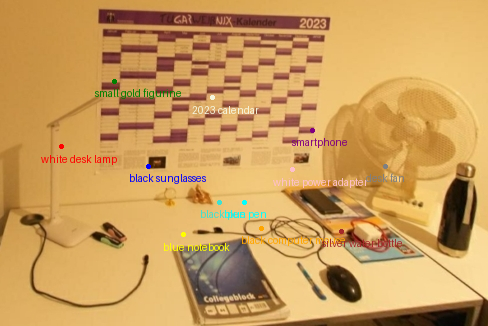

In [51]:
from utils import plot_points

prompt_text = """
    You are analyzing an image of a table with various objects.

    TASK: Locate every object that lies on the table surface, identify what each object is, and output point coordinates with descriptive labels in JSON format.

    COORDINATE SYSTEM:
    - Use NORMALIZED coordinates from 0 to 1
    - Origin (0,0) is TOP-LEFT corner of the image
    - (1,1) is BOTTOM-RIGHT corner
    - x: horizontal position (left to right)
    - y: vertical position (top to bottom)

    OBJECT IDENTIFICATION GUIDELINES:
    1. Be specific and descriptive in naming objects
    2. Use common English names (e.g., "coffee mug" not just "mug")
    3. For technical objects, use accurate terms (e.g., "Phillips screwdriver", "metric wrench")
    4. If uncertain, use general but descriptive terms (e.g., "electronic component", "metal bracket")
    5. Include size/color if it helps distinguish objects (e.g., "small red screw", "large black book")

    POINT PLACEMENT:
    - Place point at the visual center of each object
    - For irregular shapes, use the centroid
    - For objects with handles/extensions, focus on main body

    OUTPUT REQUIREMENTS:
    1. Return ONLY valid JSON array
    2. Each object must have: {"point_2d": [x, y], "label": "descriptive_name"}
    3. x and y MUST be between 0 and 1 (normalized)
    4. Include ALL objects on table surface
    5. Do NOT number labels like "object_1" - use descriptive names
    6. For multiple identical objects, add distinguishing features:
       - "blue pen" vs "black pen"
       - "hammer on left" vs "hammer on right"
       - "large notebook" vs "small notebook"

    IMPORTANT RULES:
    - Objects must be physically on the table surface
    - Ignore background objects, wall items, or floating objects
    - Do NOT use pixel coordinates - only normalized 0-1 range
    - If object is partially obscured, estimate its center

    EXAMPLE OUTPUT:
    ```json
    [
        {"point_2d": [0.324, 0.567], "label": "ceramic coffee mug"},
        {"point_2d": [0.412, 0.589], "label": "metal wrench"},
        {"point_2d": [0.538, 0.621], "label": "yellow pencil"},
        {"point_2d": [0.712, 0.489], "label": "smartphone"},
        {"point_2d": [0.823, 0.534], "label": "stack of papers"},
        {"point_2d": [0.456, 0.723], "label": "plastic water bottle"},
        {"point_2d": [0.389, 0.678], "label": "small silver screw"},
        {"point_2d": [0.645, 0.712], "label": "wooden ruler"}
    ]
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
plot_points(image_path, result)

Parsed bboxes:  [[0.052, 0.123, 0.248, 0.367], [0.123, 0.684, 0.289, 0.827], [0.324, 0.621, 0.456, 0.789], [0.389, 0.098, 0.478, 0.234], [0.467, 0.684, 0.589, 0.778], [0.521, 0.278, 0.621, 0.427], [0.645, 0.684, 0.789, 0.834], [0.712, 0.198, 0.834, 0.356], [0.189, 0.501, 0.298, 0.645], [0.324, 0.534, 0.412, 0.621]]
Parsed descriptions:  ['white desk lamp', 'blue college-block notebook', 'black smartphone', 'black USB drive', 'black computer mouse', 'white power adapter', 'silver water bottle', 'grey and black fan', 'black pen', 'blue pen']


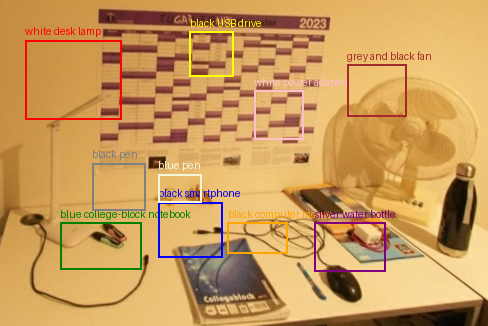

In [56]:
from utils import plot_bboxes


prompt_text = """
    You are analyzing an image of a table with various objects.

    TASK: Locate every object that lies on the table surface, identify what each object is, and output bounding box coordinates with descriptive labels in JSON format.

    COORDINATE SYSTEM:
    - Use NORMALIZED coordinates from 0 to 1
    - Origin (0,0) is TOP-LEFT corner of the image
    - (1,1) is BOTTOM-RIGHT corner
    - x: horizontal position (left to right)
    - y: vertical position (top to bottom)

    OBJECT IDENTIFICATION GUIDELINES:
    1. Be specific and descriptive in naming objects
    2. Use common English names (e.g., "coffee mug" not just "mug")
    3. For technical objects, use accurate terms (e.g., "Phillips screwdriver", "metric wrench")
    4. If uncertain, use general but descriptive terms (e.g., "electronic component", "metal bracket")
    5. Include size/color if it helps distinguish objects (e.g., "small red screw", "large black book")

    BOUNDING BOX PLACEMENT:
    - Define box as [x_min, y_min, x_max, y_max] — top-left to bottom-right corners
    - Cover the entire visible extent of the object on the table
    - For partially visible objects, estimate full bounding box based on visible portion
    - For stacked/overlapping objects, prioritize the most visible one

    OUTPUT REQUIREMENTS:
    1. Return ONLY valid JSON array
    2. Each object must have: {"bbox_2d": [x_min, y_min, x_max, y_max], "label": "descriptive_name"}
    3. All coordinates MUST be between 0 and 1 (normalized)
    4. Include ALL objects on table surface
    5. Do NOT number labels like "object_1" - use descriptive names
    6. For multiple identical objects, add distinguishing features:
       - "blue pen" vs "black pen"
       - "hammer on left" vs "hammer on right"
       - "large notebook" vs "small notebook"

    IMPORTANT RULES:
    - Objects must be physically on the table surface
    - Ignore background objects, wall items, or floating objects
    - Do NOT use pixel coordinates - only normalized 0-1 range
    - If object is partially obscured, estimate its full bounding box
    - DO NOT include wall calendars, figurines, or hanging decorations

    EXAMPLE OUTPUT:
    ```json
    [
        {"bbox_2d": [0.324, 0.567, 0.389, 0.621], "label": "ceramic coffee mug"},
        {"bbox_2d": [0.412, 0.589, 0.478, 0.635], "label": "metal wrench"},
        {"bbox_2d": [0.538, 0.621, 0.592, 0.654], "label": "yellow pencil"},
        {"bbox_2d": [0.712, 0.489, 0.789, 0.542], "label": "smartphone"},
        {"bbox_2d": [0.823, 0.534, 0.912, 0.598], "label": "stack of papers"},
        {"bbox_2d": [0.456, 0.723, 0.521, 0.789], "label": "plastic water bottle"},
        {"bbox_2d": [0.389, 0.678, 0.432, 0.712], "label": "small silver screw"},
        {"bbox_2d": [0.645, 0.712, 0.723, 0.756], "label": "wooden ruler"}
    ]
"""
image_path = "/home/jupyter/project/experiments/table.jpeg"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
plot_bboxes(image_path, result)

In [9]:
prompt_text = """
    You are an object detection and description assistant.
    
    IMAGE DESCRIPTION:
    - The image shows a table with multiple objects
    - Each object is marked with a visible red dot at its center
    - The red dots are your guide to locate ALL objects

    TASK:
    1. For EVERY red dot on the image, identify the corresponding object
    2. For each object, provide exactly 4 attributes in this format:
       [Object name], [main color], [size: small/medium/large], [position: left/center/right part of the table]

    DETECTION RULES:
    1. **Red dot priority**: Only process objects with red dots. Ignore objects without dots.
    2. **Object identification**: Determine the most specific name for each object (e.g., "screwdriver" not just "tool")
    3. **Color determination**: Identify the dominant/main color of the object
    4. **Size classification**:
       - Small: fits within 5% of image width
       - Medium: 5-15% of image width  
       - Large: >15% of image width
    5. **Position reference**: Use "table" as reference frame:
       - Left: left 1/3 of table area
       - Center: middle 1/3 of table area
       - Right: right 1/3 of table area

    OUTPUT FORMAT:
    - One line per object
    - Exactly: [Name], [Color], [Size], [Position]
    - Example: "Phillips screwdriver, red, medium, left part of the table"
    - List ALL objects in consistent order (e.g., left to right, top to bottom)

    SPECIAL CASES:
    1. **Dense clusters**: If dots are very close, analyze each separately
    2. **Overlapping objects**: Use the red dot position to determine which object
    3. **Uncertain objects**: Use best descriptive name (e.g., "electronic component" if unsure)
    4. **Multiple colors**: Choose the most prominent/visible color

    START DETECTION NOW. Return only the list, no explanations.
"""
image_path = "/home/jupyter/project/experiments/table_pointed.png"

result = generate_description(prompt_text, image_path, max_new_tokens=1024)
display(Markdown(result))

Lamp, white, medium, left part of the table
Calendar, purple, large, center part of the table
Fan, black, large, right part of the table
Power adapter, white, small, left part of the table
Glasses, gold, small, left part of the table
Stone, brown, small, left part of the table
Mobile phone, black, small, center part of the table
Calculator, silver, small, center part of the table
Mouse, black, small, center part of the table
Pen, blue, small, center part of the table
Notebook, blue, medium, left part of the table
Water bottle, silver, medium, right part of the table
Charger, black, small, center part of the table
USB drive, blue, small, center part of the table